### **DOMAIN: Electronics and Telecommunication**

**• CONTEXT:** A communications equipment manufacturing company has a product which is responsible for emitting informative signals. Company wants to build a machine learning model which can help the company to predict the equipment’s signal quality using various parameters. 
**• DATA DESCRIPTION:** The data set contains information on various signal tests performed:

 1. Parameters: Various measurable signal parameters. 
 2. Signal_Quality: Final signal strength or quality 
 
**• PROJECT OBJECTIVE:** The need is to build a regressor which can use these parameters to determine the signal strength or quality [as number]. 

**Steps and tasks:** [ Total Score: 10 points] 
1. Import data. 
2. Data analysis & visualisation • Perform relevant and detailed statistical analysis on the data. • Perform relevant and detailed uni, bi and multi variate analysis. Hint: Use your best analytical approach. Even you can mix match columns to create new columns which can be used for better analysis. Create your own features if required. Be highly experimental and analytical here to find relevant hidden patterns. 
3. Design, train, tune and test a neural network regressor. Hint: Use best approach to refine and tune the data or the model. Be highly experimental here.

4. Pickle the model for future use.

# **import data**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('/content/drive/MyDrive/Data Science Files/Data sets/Part- 1,2&3 - Signal.csv')

In [3]:
df

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# **Data Exploring**

In [4]:
#checking info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
#checking min,max.std
df.describe()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
#checking null values
df.isna().sum()

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64

In [7]:
#checking unique values in each variable
df.nunique()

Parameter 1         96
Parameter 2        143
Parameter 3         80
Parameter 4         91
Parameter 5        153
Parameter 6         60
Parameter 7        144
Parameter 8        436
Parameter 9         89
Parameter 10        96
Parameter 11        65
Signal_Strength      6
dtype: int64

# EDA

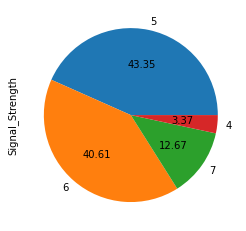

In [8]:
df['Signal_Strength'].value_counts().head(4).plot(kind = 'pie' ,autopct='%.2f' )

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


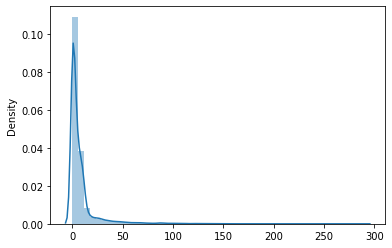

In [9]:
res = sns.distplot(df)
plt.show()

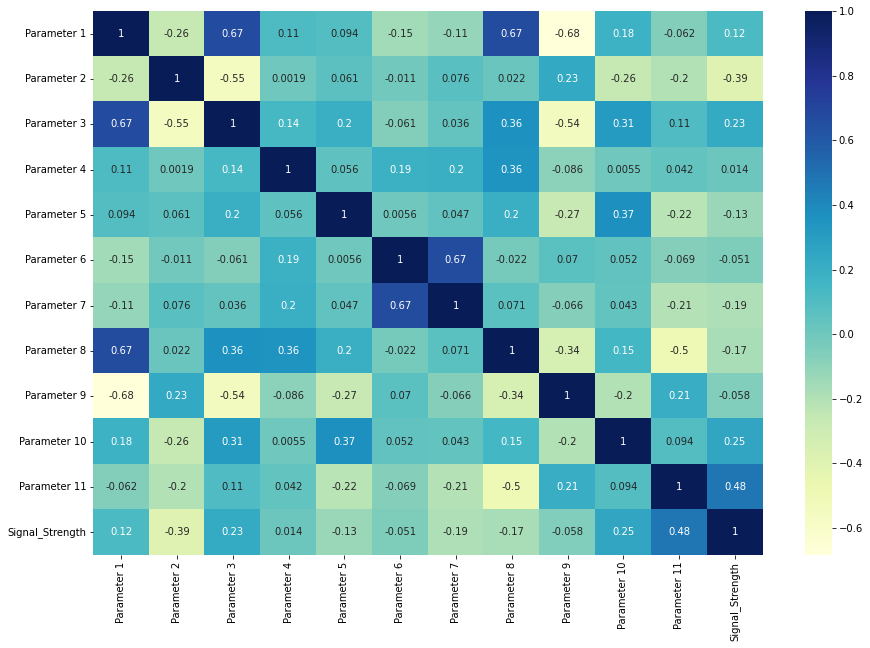

In [10]:
# plotting correlation heatmap
plt.figure(figsize=(15,10))
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


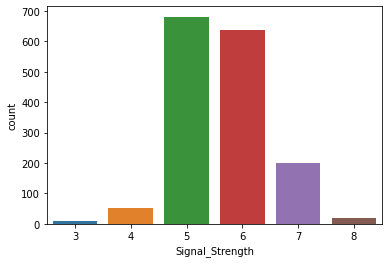

In [11]:
sns.countplot(df['Signal_Strength'],)

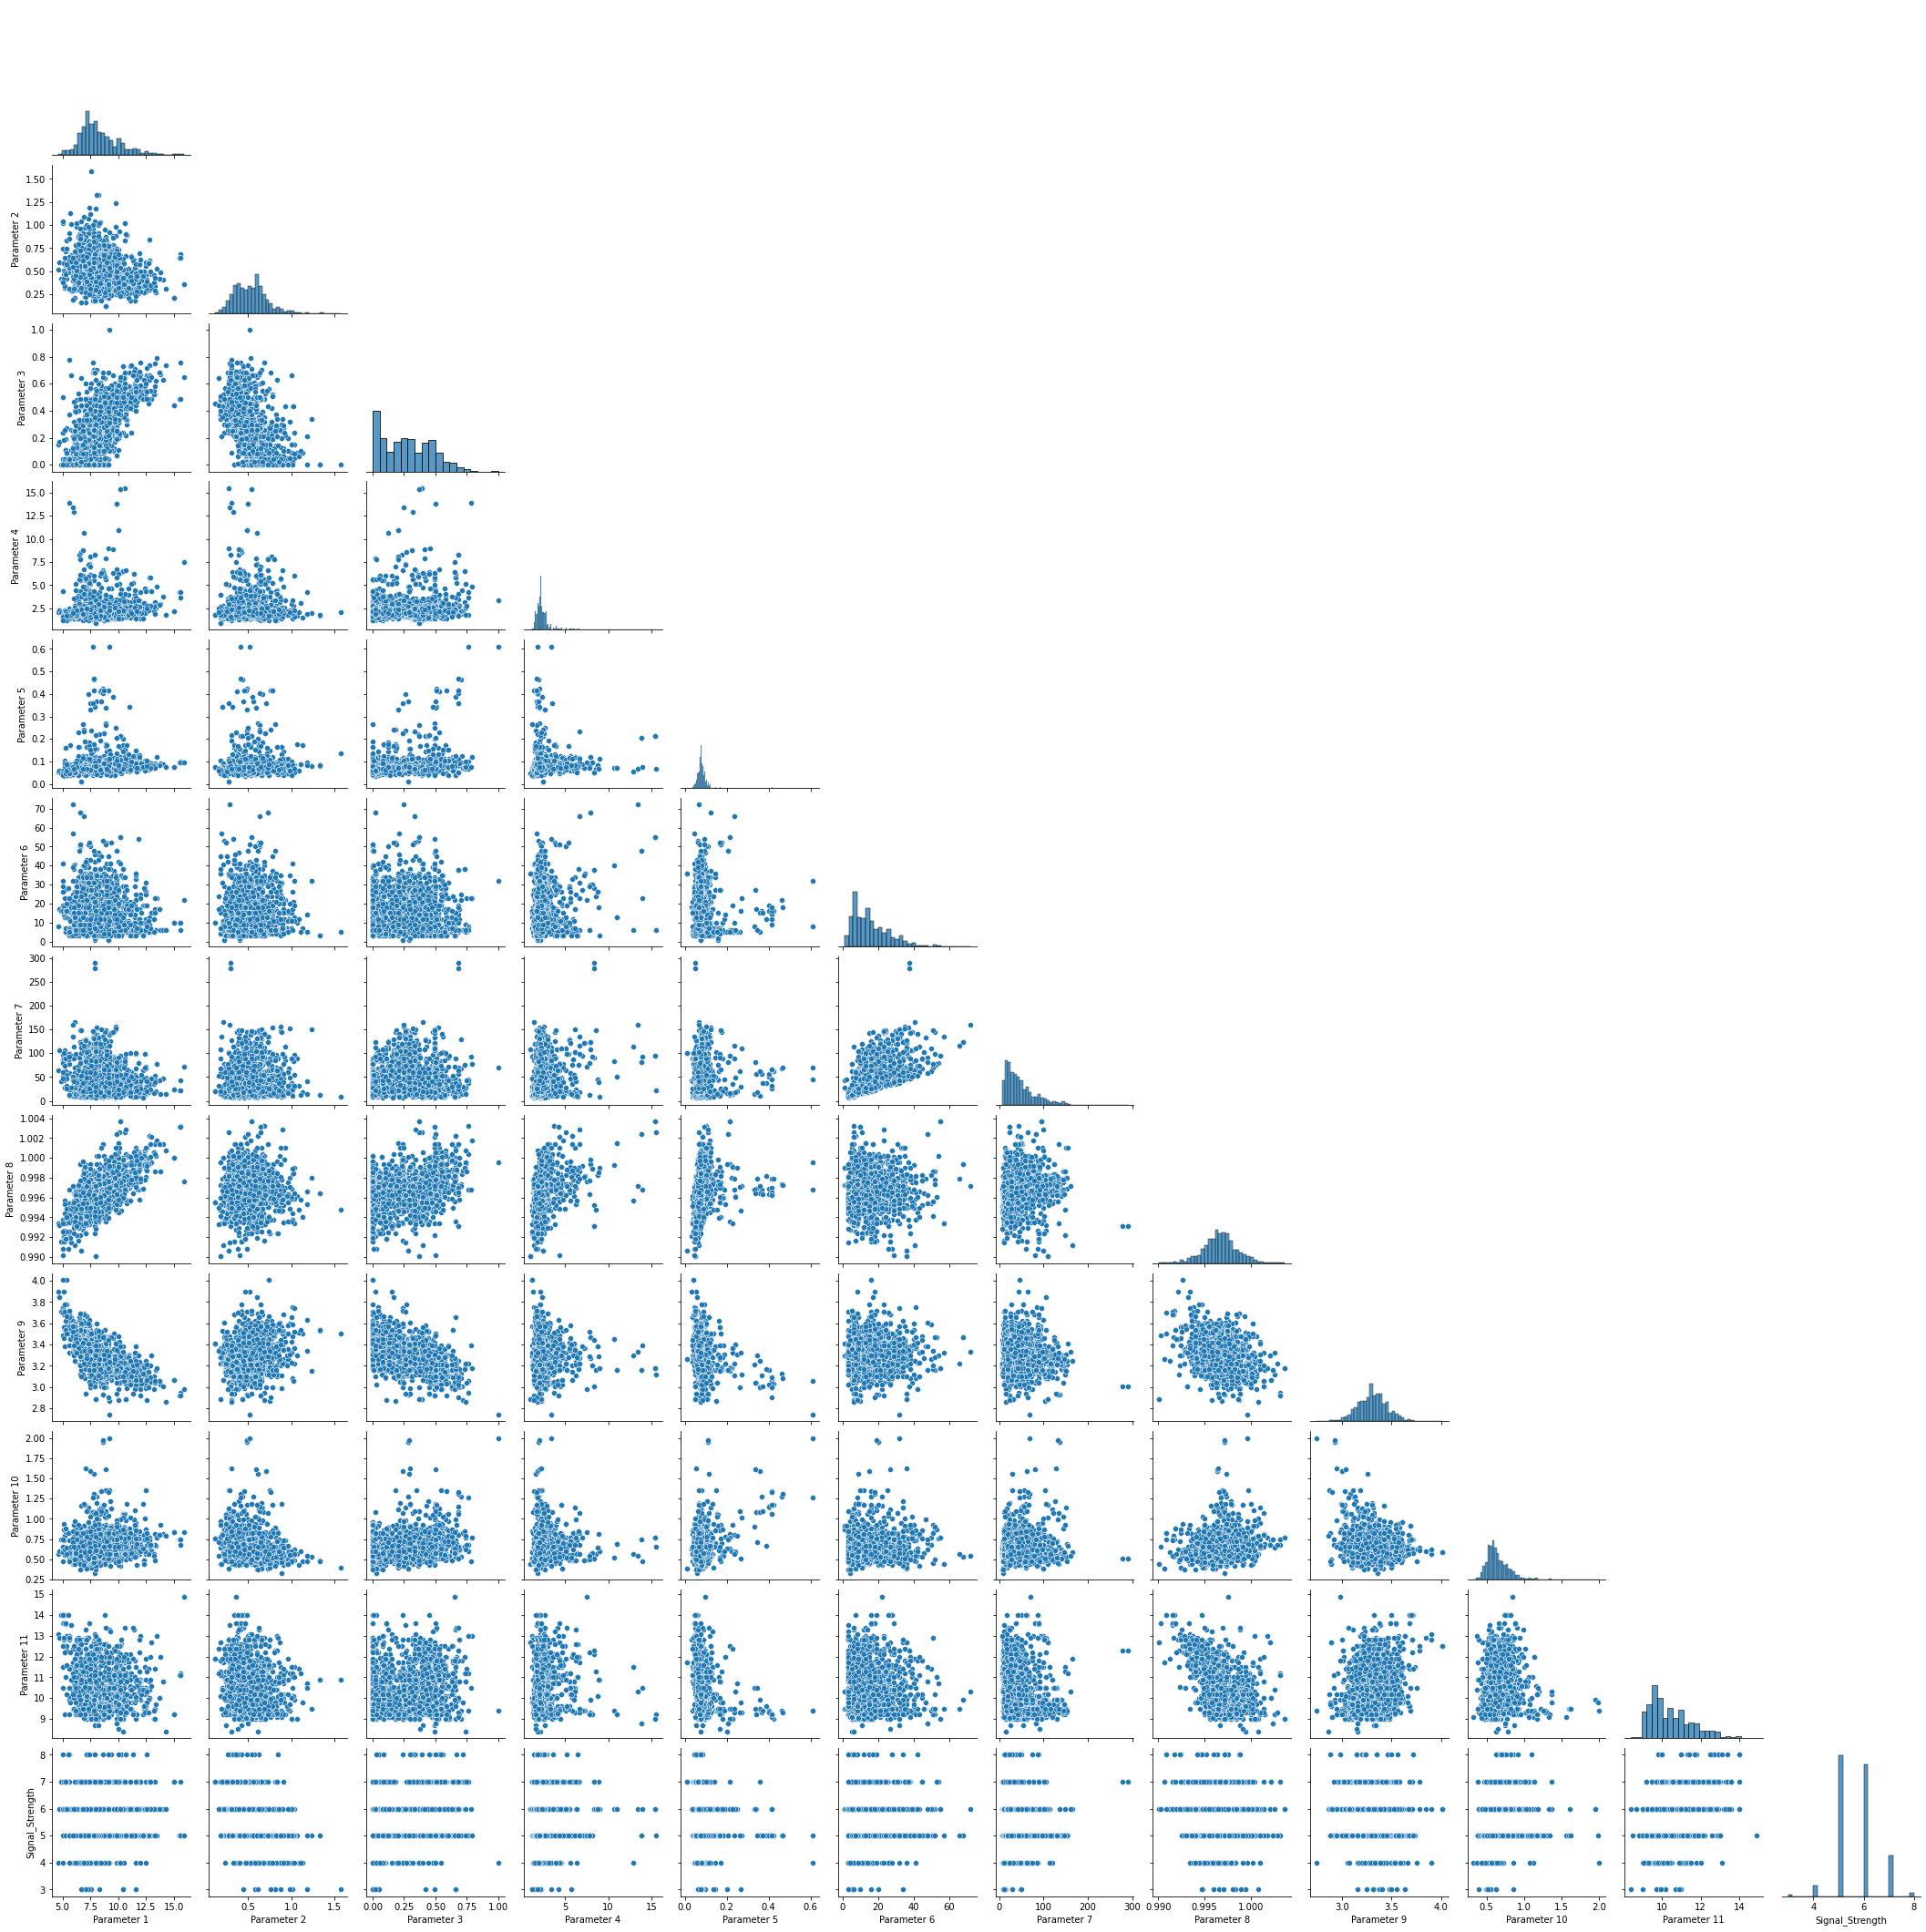

In [12]:
sns.pairplot(df , corner=True , palette = 'Dark' )

In [13]:
#create a box plot
import plotly.express as px
plt.figure(figsize = (1,1))
fig = px.box(df, x='Parameter 1')
fig.show()
fig = px.box(df, x='Parameter 2')
fig.show()
fig = px.box(df, x='Parameter 3')
fig.show()
fig = px.box(df, x='Parameter 4')
fig.show()
fig = px.box(df, x='Parameter 5')
fig.show()
fig = px.box(df, x='Parameter 6')
fig.show()
fig = px.box(df, x='Parameter 7')
fig.show()
fig = px.box(df, x='Parameter 8')
fig.show()
fig = px.box(df, x='Parameter 9')
fig.show()
fig = px.box(df, x='Parameter 10')
fig.show()
fig = px.box(df, x='Parameter 11')
fig.show()

<Figure size 72x72 with 0 Axes>

In [14]:
fig = px.scatter_matrix(df[['Parameter 1',	'Parameter 2',	'Parameter 3',	'Parameter 4',	'Parameter 5',	'Parameter 6',
                            'Parameter 7'	,'Parameter 8',	'Parameter 9',	'Parameter 10',	'Parameter 11',	'Signal_Strength']])
fig.show()

Some features shows outliers we will do scaling

# **Scaling and Train Test Split**

In [15]:
X = df.drop('Signal_Strength',axis=1)
y = df['Signal_Strength']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# **Scaling**

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
#scaler = MinMaxScaler()
#X_train= scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

In [20]:
X_train.shape

(1119, 11)

In [21]:
X_test.shape

(480, 11)

## **Random Forest Regressor**

In [22]:
#Random forest regressor model building
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor()
RF_model.fit(X_train, y_train)

RandomForestRegressor()

In [23]:
RF_pred=RF_model.predict(X_test)

In [24]:
RF_pred

array([5.3 , 5.23, 5.38, 5.22, 5.93, 5.06, 5.08, 5.03, 6.11, 5.96, 6.37,
       5.33, 5.82, 5.24, 5.44, 6.52, 5.23, 5.69, 6.84, 5.09, 4.85, 5.85,
       5.59, 6.08, 5.72, 5.96, 6.35, 5.29, 5.27, 5.98, 5.26, 5.53, 5.85,
       5.47, 5.46, 5.07, 6.35, 6.03, 5.49, 6.33, 4.96, 5.2 , 6.12, 5.06,
       5.58, 5.62, 6.42, 5.55, 5.06, 5.58, 5.05, 5.33, 5.53, 6.93, 5.27,
       5.09, 6.  , 5.96, 5.43, 5.05, 5.52, 6.08, 5.47, 5.18, 6.85, 5.32,
       6.75, 5.66, 6.7 , 5.46, 6.15, 5.25, 5.81, 5.66, 6.07, 5.04, 6.55,
       5.37, 5.95, 6.53, 5.21, 6.87, 5.18, 5.67, 5.89, 6.62, 5.03, 6.07,
       6.46, 5.54, 6.56, 5.52, 5.27, 5.24, 5.21, 5.61, 5.15, 5.8 , 4.62,
       5.55, 4.97, 5.04, 5.73, 6.  , 5.38, 6.74, 5.81, 5.23, 5.35, 5.15,
       6.45, 4.99, 6.62, 5.02, 5.1 , 5.97, 5.55, 5.33, 5.13, 5.78, 6.33,
       5.74, 5.73, 5.46, 5.81, 5.3 , 6.54, 5.41, 5.25, 5.6 , 5.81, 5.35,
       5.02, 6.51, 5.58, 5.02, 4.92, 5.29, 5.25, 5.86, 6.59, 6.28, 6.54,
       5.32, 5.54, 5.  , 5.77, 5.65, 5.7 , 5.15, 5.

## **Evaluation on Test Data**

In [25]:
from sklearn.metrics import r2_score ,accuracy_score 
r2_score(y_test,RF_pred)

0.4503042326412421

In [26]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [27]:
mean_absolute_error(y_test,RF_pred)

0.44466666666666665

In [28]:
mean_squared_error(y_test,RF_pred)

0.34852

In [29]:
np.sqrt(mean_squared_error(y_test,RF_pred))

0.5903558249056242

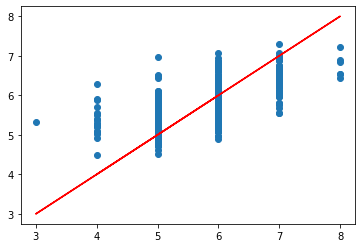

In [30]:
# Our predictions
plt.scatter(y_test,RF_pred)

# Perfect predictions
plt.plot(y_test,y_test,'r')

## **Random Forest Classifier**

In [31]:
#Random forest Classifier model building
from sklearn.ensemble import RandomForestClassifier
RFc_model = RandomForestClassifier()
RF_model.fit(X_train, y_train)

RandomForestRegressor()

In [32]:
RFc_pred=RF_model.predict(X_test)

In [33]:
RFc_pred

array([5.29, 5.07, 5.48, 5.23, 5.91, 5.06, 5.07, 4.93, 6.  , 6.01, 6.35,
       5.36, 5.91, 5.29, 5.46, 6.48, 5.31, 5.71, 7.02, 5.14, 4.91, 5.86,
       5.49, 6.11, 5.66, 5.99, 6.46, 5.19, 5.27, 5.94, 5.35, 5.43, 5.84,
       5.51, 5.31, 5.05, 6.39, 6.  , 5.37, 6.35, 4.99, 5.18, 6.39, 5.04,
       5.44, 5.67, 6.45, 5.51, 5.03, 5.65, 5.04, 5.27, 5.65, 6.94, 5.21,
       5.09, 6.01, 5.89, 5.5 , 5.03, 5.52, 6.13, 5.65, 5.37, 6.83, 5.33,
       6.74, 5.66, 6.86, 5.51, 6.21, 5.2 , 5.79, 5.67, 6.07, 5.13, 6.51,
       5.49, 5.86, 6.6 , 5.16, 6.92, 5.16, 5.71, 5.76, 6.64, 5.08, 6.04,
       6.52, 5.46, 6.56, 5.58, 5.18, 5.37, 5.17, 5.34, 5.24, 5.79, 4.58,
       5.52, 4.97, 5.05, 5.7 , 5.88, 5.29, 6.73, 5.82, 5.28, 5.23, 5.18,
       6.42, 5.07, 6.49, 5.07, 5.24, 5.95, 5.57, 5.37, 4.97, 5.75, 6.31,
       5.77, 5.7 , 5.32, 5.83, 5.33, 6.6 , 5.39, 5.22, 5.51, 5.79, 5.44,
       5.02, 6.54, 5.65, 5.05, 4.89, 5.39, 5.08, 5.84, 6.51, 6.31, 6.67,
       5.42, 5.44, 5.04, 5.71, 5.83, 5.74, 5.08, 5.

In [34]:
from sklearn.metrics import r2_score ,accuracy_score 
r2_score(y_test,RF_pred)

0.4503042326412421

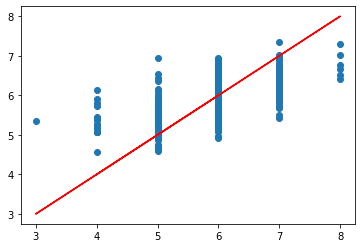

In [55]:
# Our predictions
plt.scatter(y_test,RFc_pred)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [38]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


{'bootstrap': True,
 'max_depth': 110,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 1000}

In [40]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [41]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

Model Performance
Average Error: 0.4603 degrees.
Accuracy = 91.65%.


# **Creating Deep Learning Model**

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

In [45]:
model = Sequential()

model.add(Dense(11,activation='relu'))
model.add(Dense(11,activation='relu'))
model.add(Dense(11,activation='relu'))
model.add(Dense(11,activation='relu'))
model.add(Dense(1))

#model.compile(optimizer='tf.keras.optimizers.Adam(0.1)',loss='mse')

In [46]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

In [59]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=80)

Epoch 1/80
9/9 [==============================] - 0s 44ms/step - loss: 0.4736 - val_loss: 0.4338
Epoch 2/80
9/9 [==============================] - 0s 10ms/step - loss: 0.4725 - val_loss: 0.4306
Epoch 3/80
9/9 [==============================] - 0s 12ms/step - loss: 0.4376 - val_loss: 0.4205
Epoch 4/80
9/9 [==============================] - 0s 22ms/step - loss: 0.4436 - val_loss: 0.4244
Epoch 5/80
9/9 [==============================] - 0s 10ms/step - loss: 0.4255 - val_loss: 0.4166
Epoch 6/80
9/9 [==============================] - 0s 19ms/step - loss: 0.4265 - val_loss: 0.4566
Epoch 7/80
9/9 [==============================] - 0s 12ms/step - loss: 0.4611 - val_loss: 0.4538
Epoch 8/80
9/9 [==============================] - 0s 15ms/step - loss: 0.4331 - val_loss: 0.4212
Epoch 9/80
9/9 [==============================] - 0s 11ms/step - loss: 0.4453 - val_loss: 0.4457
Epoch 10/80
9/9 [==============================] - 0s 15ms/step - loss: 0.4579 - val_loss: 0.4579
Epoch 11/80
9/9 [============

In [60]:
losses = pd.DataFrame(model.history.history)

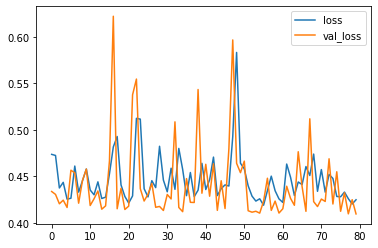

In [61]:
losses.plot()

In [62]:
predictions = model.predict(X_test)

In [63]:
mean_absolute_error(y_test,predictions)

0.5155060311158498

In [64]:
mean_squared_error(y_test,predictions)

0.4096681501958727

# **Hyper parameter tuning**

In [78]:
pip install bayesian-optimization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.2.0-py3-none-any.whl size=11685 sha256=961e14815eefa416e5fd2652c327cd54484f01b043e9a0927039583a42c612da
  Stored in directory: /root/.cache/pip/wheels/fd/9b/71/f127d694e02eb40bcf18c7ae9613b88a6be4470f57a8528c5b
Successfully built bayesian-optimization


In [79]:
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from math import floor
from sklearn.metrics import make_scorer, accuracy_score
from bayes_opt import BayesianOptimization
from sklearn.model_selection import StratifiedKFold
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

In [65]:
# Create function
def nn_cl_bo(neurons, activation, optimizer, learning_rate,  batch_size, epochs ):
    optimizerL = ['SGD', 'Adam', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl','SGD']
    optimizerD= {'Adam':Adam(lr=learning_rate), 'SGD':SGD(lr=learning_rate),
                 'RMSprop':RMSprop(lr=learning_rate), 'Adadelta':Adadelta(lr=learning_rate),
                 'Adagrad':Adagrad(lr=learning_rate), 'Adamax':Adamax(lr=learning_rate),
                 'Nadam':Nadam(lr=learning_rate), 'Ftrl':Ftrl(lr=learning_rate)}
    activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
                   'elu', 'exponential', LeakyReLU,'relu']
    neurons = round(neurons)
    activation = activationL[round(activation)]

In [82]:
# Set paramaters
params_nn ={
    'neurons': (10, 100),
    'activation':(0, 9),
    'optimizer':(0,7),
    'learning_rate':(0.01, 1),
    'batch_size':(200, 1000),
    'epochs':(20, 100)}
# Run Bayesian Optimization
nn_bo = BayesianOptimization(nn_cl_bo, params_nn, random_state=42)
nn_bo.maximize(init_points=25, n_iter=4)

|   iter    |  target   | activa... | batch_... |  epochs   | learni... |  neurons  | optimizer |
-------------------------------------------------------------------------------------------------


TypeError: ignored